# Linear regression and Logistic regression code

**Notation:**

$\alpha = \text{Learning rate}$

$MSE = \text{Mean squared error}$ 

$\nabla_{\theta} = \text{Gradient}$

$m = \text{Length of the training set}$

$\theta = \text{Theta parameters}$

**Equations Logistic Regression:**


**Sigmoid function**

$\sigma (p) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-p}}  $ 

**Model prediction** 

$p = \sigma(\theta \cdot X)$




$y =
\begin{cases}
  0 =\text {if  p} \lt 0.5\\
  1 =\text {if  p} \geq 0.5
\end{cases}
$



**Cost Function**

$\text {Binary cross entropy loss} = -\frac{1}{m} \sum_{i=1}^m[y log(p)+(1-y)log(1-p)]$

**Gradient**

$\nabla_{\theta} \to \frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m ({p - y})x$

**Vectorized Gradient**

$\nabla_{\theta}$  $ = \frac{1}{m} \cdot X^T (p- y)$

**Update theta**

$\theta = \theta - \alpha \cdot \nabla_{\theta}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
class Classification():
    def __init__(self):
        self._iterations = 2000
        self._learning_rate = 0.001
        self.theta = None
        self.cost = []

    def sigmoid(self,x):
        z = 1/(1 + np.exp(-x))
        return z

    def fit(self,X,y):
        m,n = X.shape
        self.theta = np.random.randn(n) 
        X_with_bias = np.c_[np.ones(m),X] 
        self.theta = np.insert(self.theta,0,0)
        for i in range(self._iterations):
            h = np.dot(X_with_bias,self.theta)
            z = self.sigmoid(h)    
            J = (-1/m)*np.sum((y*np.log(z))+((1-y)*np.log(1-z)))
            error = z - y
            grad = (1/m)*np.dot(X_with_bias.T,error)
            self.theta =  self.theta - self._learning_rate*grad
            self.cost.append(J)
        self.plot()
        

    def predict(self, X_test):        
        m_test = X_test.shape[0]
        X_test_bias = np.c_[np.ones(m_test),X_test]
        pred = np.dot(X_test_bias,self.theta)
        return (pred >= 0.5 )*1


In [211]:
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

### Creating a toy dataset for testing the class

Seems to work

### Now lets test the classification class

Another toy dataset

In [12]:
x, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

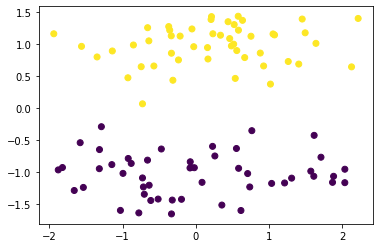

In [13]:
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

In [14]:
logistic_regression = Classification()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

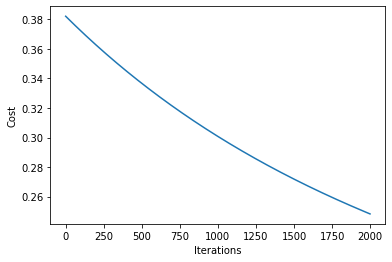

In [16]:
logistic_regression.fit(x_train, y_train)


In [17]:
preds = logistic_regression.predict(x_test)

In [18]:
theta = logistic_regression.theta

We will plot the decision boundary to see how the model performs

In [19]:
min_, max_ = np.min(x[:,0]), np.max(x[:,0])

In [20]:
boundary = -(np.dot(theta[1]/theta[2],[min_,max_]) - (theta[0] / theta[2]))


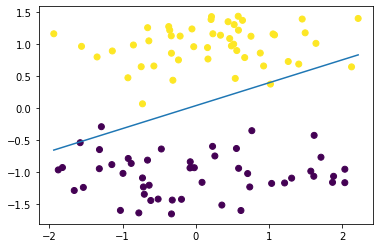

In [21]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.plot(np.array([min_,max_]),boundary)
plt.show()

Seems to work too!

Now these two classes will be exported to the LinearModels.py file to be used and evaluated in a more complicated datasets